In [1]:
import pylab as pl
import PIL
import pyavm
import numpy as np
from astropy import wcs, units as u
from astropy.io import fits
import requests

In [2]:

result = requests.get('https://www.dropbox.com/s/umrye8akxk2kmy4/BrickSpitzer_RGB_I321.png?dl=1')
with open('BrickSpitzer_RGB_I321.png', 'wb') as fh:
    fh.write(result.content)

Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


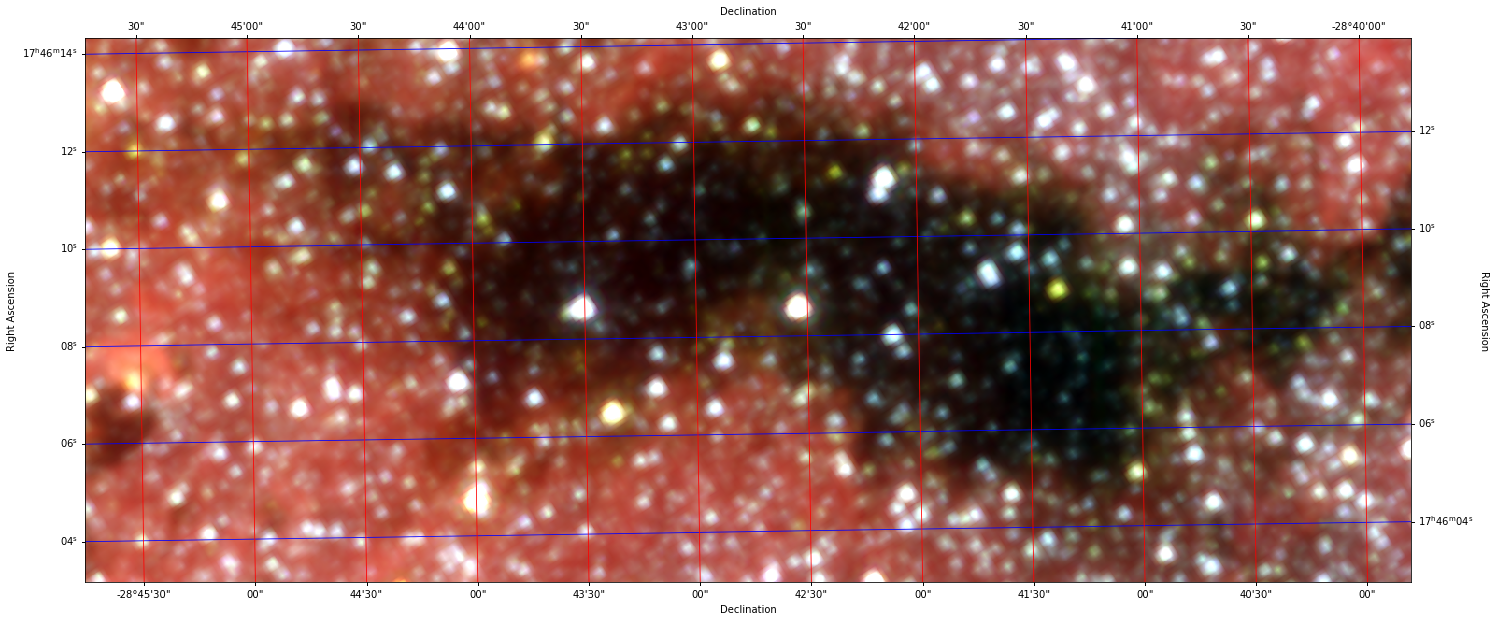

In [3]:
rgb_spitzer_scaled = np.array(PIL.Image.open('BrickSpitzer_RGB_I321.png'))[::-1,:,:]
avm = pyavm.AVM.from_image('BrickSpitzer_RGB_I321.png')
ww = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))
pl.figure(figsize=(24,10))
ax = pl.subplot(projection=ww)


ax.imshow(rgb_spitzer_scaled, origin='lower', interpolation='none')

ra = ax.coords['ra']
ra.set_ticks(spacing=0.5 * u.arcmin)
dec = ax.coords['dec']
dec.set_ticks(spacing=0.5 * u.arcmin)

ra.grid(color='b')
dec.grid(color='r')
dec.set_axislabel('Declination')
ra.set_axislabel('Right Ascension')

dec.set_ticks_position('bt')
dec.set_ticklabel_position('bt')
dec.set_axislabel_position('bt')
ra.set_ticks_position('lr')
ra.set_ticklabel_position('lr')
ra.set_axislabel_position('lr')

Signature: ra.grid(draw_grid=True, grid_type=None, **kwargs)
Docstring:
Plot grid lines for this coordinate.

Standard matplotlib appearance options (color, alpha, etc.) can be
passed as keyword arguments.

Parameters
----------
draw_grid : bool
    Whether to show the gridlines
grid_type : {'lines', 'contours'}
    Whether to plot the contours by determining the grid lines in
    world coordinates and then plotting them in world coordinates
    (``'lines'``) or by determining the world coordinates at many
    positions in the image and then drawing contours
    (``'contours'``). The first is recommended for 2-d images, while
    for 3-d (or higher dimensional) cubes, the ``'contours'`` option
    is recommended. By default, 'lines' is used if the transform has
    an inverse, otherwise 'contours' is used.
File:      /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/astropy/visualization/wcsaxes/coordinate_helpers.py
Type:      method
